# Practical Exam Technical Report: Travel Assured

A travel insurance company

Problem: Cut marketing budget by 50% due to COVID-19 therefore need to advertise in the right place and to the right people

Dataset: Current customers & non-customers (recieved quotes but not the insurance)

2 Requirements:
1. Are there differences in the travel habits between customers and non-customers?
2. What is the typical profile of customers and non-customers?

In [1]:
# import packages and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config ZMQInteractiveShell.ast_node_interactivity='all'
%config IPCompleter.greedy = True
%matplotlib inline
sns.set_theme()
pd.options.display.max_columns = None
pd.options.display.max_rows = 200

# load csv as a pandas dataframe
df = pd.read_csv("./data/travel_insurance.csv")

df.columns = [
    "age",
    "employement_type",
    "graduated",
    "annual_income",
    "family_members",
    "chronic_diseases",
    "frequent_flyer",
    "travelled_abroad",
    "customer",
]

display(df, df.info(), df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1987 non-null   int64 
 1   employement_type  1987 non-null   object
 2   graduated         1987 non-null   object
 3   annual_income     1987 non-null   int64 
 4   family_members    1987 non-null   int64 
 5   chronic_diseases  1987 non-null   int64 
 6   frequent_flyer    1987 non-null   object
 7   travelled_abroad  1987 non-null   object
 8   customer          1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


,age,employement_type,graduated,annual_income,family_members,chronic_diseases,frequent_flyer,travelled_abroad,customer
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


None

age                 0
employement_type    0
graduated           0
annual_income       0
family_members      0
chronic_diseases    0
frequent_flyer      0
travelled_abroad    0
customer            0
dtype: int64

In [2]:
# convert object columns to integer columns
df[['graduated', 'chronic_diseases', 'frequent_flyer', 'travelled_abroad', 'customer']] = df[['graduated', 'chronic_diseases', 'frequent_flyer', 'travelled_abroad', 'customer']].replace({'No': 0, 'Yes': 1})

# check for any duplicates
duplicates = df.duplicated(keep=False)

# display all duplicate rows
display(df[duplicates].sort_values(by=['age', 'employement_type', 'annual_income', 'family_members', 'chronic_diseases', 'frequent_flyer', 'travelled_abroad', 'customer']).head(50))

,age,employement_type,graduated,annual_income,family_members,chronic_diseases,frequent_flyer,travelled_abroad,customer
184,25,Government Sector,1,750000,3,0,0,0,0
724,25,Government Sector,1,750000,3,0,0,0,0
629,25,Private Sector/Self Employed,0,600000,4,0,1,0,0
1013,25,Private Sector/Self Employed,0,600000,4,0,1,0,0
1898,25,Private Sector/Self Employed,0,600000,4,1,1,0,0
1905,25,Private Sector/Self Employed,0,600000,4,1,1,0,0
359,25,Private Sector/Self Employed,0,1150000,3,0,0,0,0
1315,25,Private Sector/Self Employed,0,1150000,3,0,0,0,0
1633,25,Private Sector/Self Employed,0,1150000,3,0,1,0,0
1645,25,Private Sector/Self Employed,0,1150000,3,0,1,0,0


In [3]:
# drop all duplicates and keep only first instance
df = df.drop_duplicates().reset_index(drop=True)

display(df, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1249 non-null   int64 
 1   employement_type  1249 non-null   object
 2   graduated         1249 non-null   int64 
 3   annual_income     1249 non-null   int64 
 4   family_members    1249 non-null   int64 
 5   chronic_diseases  1249 non-null   int64 
 6   frequent_flyer    1249 non-null   int64 
 7   travelled_abroad  1249 non-null   int64 
 8   customer          1249 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 87.9+ KB


,age,employement_type,graduated,annual_income,family_members,chronic_diseases,frequent_flyer,travelled_abroad,customer
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1244,32,Government Sector,1,900000,6,0,0,0,0
1245,27,Government Sector,1,850000,3,0,0,0,1
1246,33,Private Sector/Self Employed,1,1500000,4,0,1,1,1
1247,28,Private Sector/Self Employed,1,1750000,5,1,0,1,0


None

### Problem validation: Any difference between current customers and non-customers

[[Text(0, 0, '483'), Text(0, 0, '766')]]

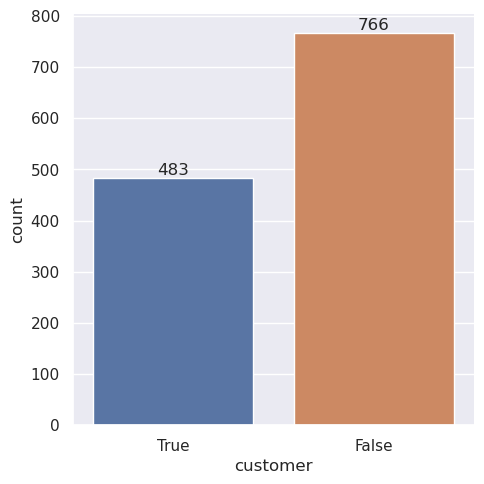

In [8]:
# plot bar chart
g = sns.catplot(data=df, x='customer', kind='count', order=[True, False])

# add bar labels
[ax.bar_label(ax.containers[0]) for ax in g.axes.flat]

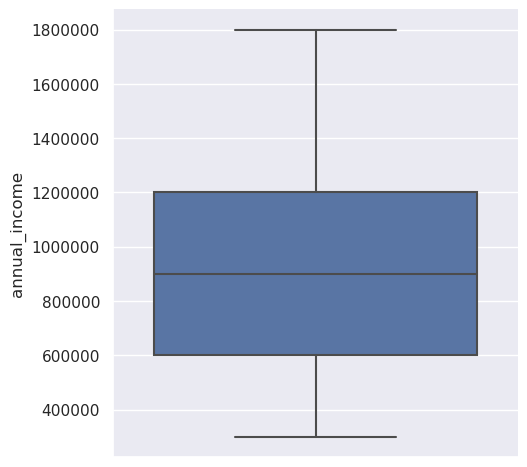

In [9]:
# plot box chart
g = sns.catplot(data=df, y='annual_income', kind='box')

# change y-axis scale
g.axes.flat[0].ticklabel_format(style='plain', axis='y')

### Requirement 1: Are there differences in the travel habits between customers and non-customers?

[Text(0, 0, '167'), Text(0, 0, '316')]

[Text(0, 0, '77'), Text(0, 0, '689')]

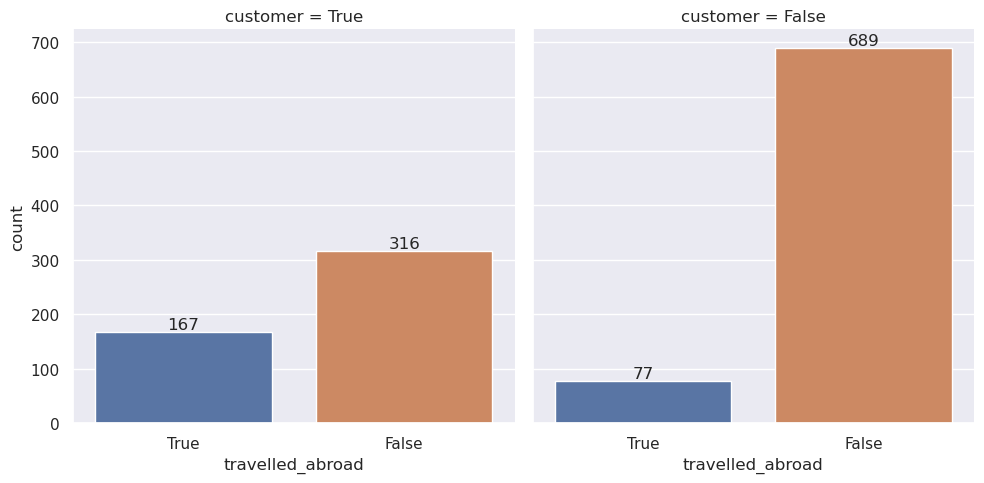

In [10]:
# plot catplot
g = sns.catplot(data=df, x='travelled_abroad', col='customer', kind='count', order=[True, False], col_order=[True, False])

# add bar labels
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])

[Text(0, 0, '10'), Text(0, 0, '13')]

[Text(0, 0, '33'), Text(0, 0, '51')]

[Text(0, 0, '32'), Text(0, 0, '69')]

[Text(0, 0, '31'), Text(0, 0, '49')]

[Text(0, 0, '25'), Text(0, 0, '56')]

[Text(0, 0, '22'), Text(0, 0, '49')]

[Text(0, 0, '4'), Text(0, 0, '15')]

[Text(0, 0, '10'), Text(0, 0, '14')]

[Text(0, 0, '4'), Text(0, 0, '51')]

[Text(0, 0, '17'), Text(0, 0, '124')]

[Text(0, 0, '22'), Text(0, 0, '152')]

[Text(0, 0, '17'), Text(0, 0, '146')]

[Text(0, 0, '9'), Text(0, 0, '96')]

[Text(0, 0, '5'), Text(0, 0, '64')]

[Text(0, 0, '2'), Text(0, 0, '31')]

[Text(0, 0, '1'), Text(0, 0, '25')]

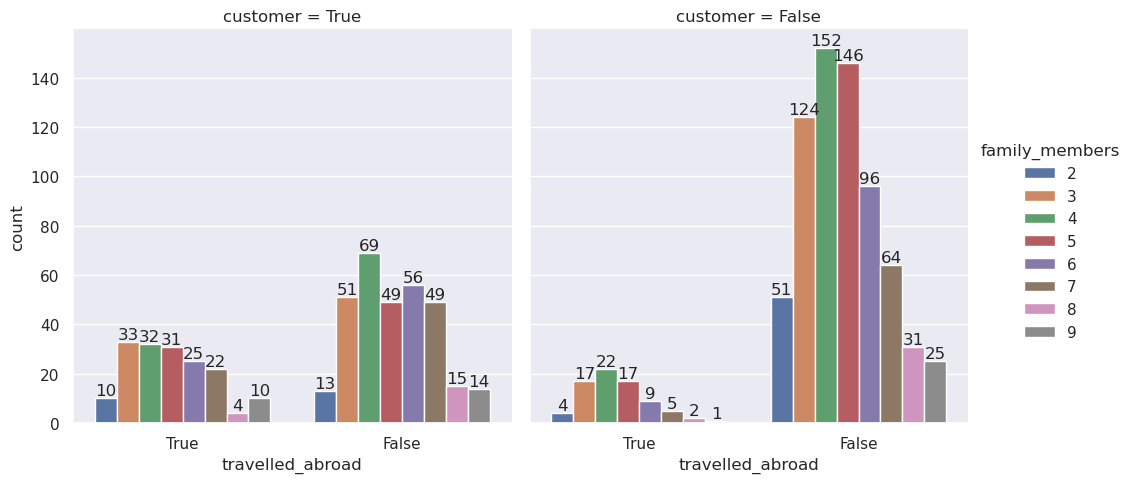

In [11]:
# plot catplot
g = sns.catplot(data=df, x='travelled_abroad', col='customer', kind='count', order=[True, False], col_order=[True, False], hue='family_members')

# add bar labels
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.bar_label(ax.containers[2])
    ax.bar_label(ax.containers[3])
    ax.bar_label(ax.containers[4])
    ax.bar_label(ax.containers[5])
    ax.bar_label(ax.containers[6])
    ax.bar_label(ax.containers[7])

### Key insight #1
comparing travel habits between customers and non-customers, our customers (298) have travelled abroad more before than non-customers (82). This is good for us as we are matching our product (travel insurance) with people who travel abroad and could need travel insurance.

[Text(0, 0, '147'), Text(0, 0, '336')]

[Text(0, 0, '148'), Text(0, 0, '618')]

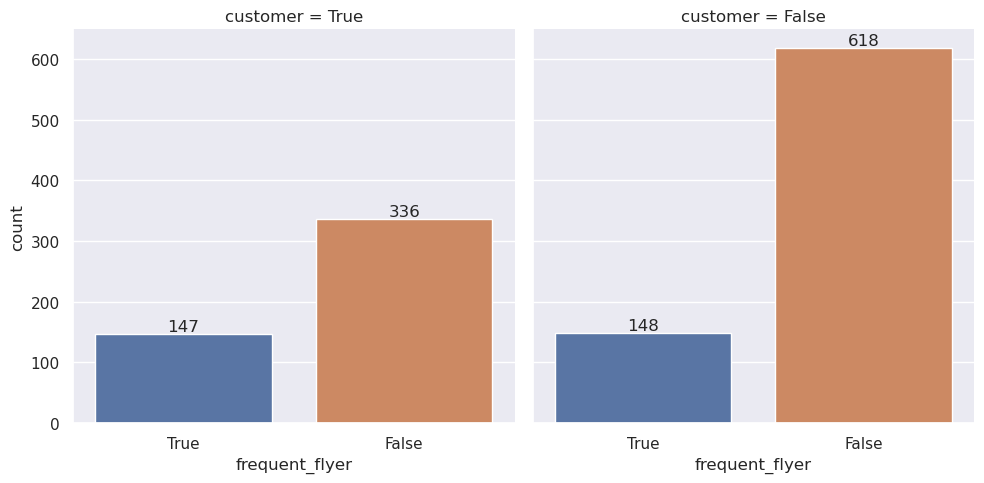

In [12]:
# plot catplot
g = sns.catplot(data=df, x='frequent_flyer', col='customer', kind='count', order=[True, False], col_order=[True, False])

# add bar labels
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0]);

[Text(0, 0, '30'), Text(0, 0, '93')]

[Text(0, 0, '117'), Text(0, 0, '243')]

[Text(0, 0, '29'), Text(0, 0, '221')]

[Text(0, 0, '119'), Text(0, 0, '397')]

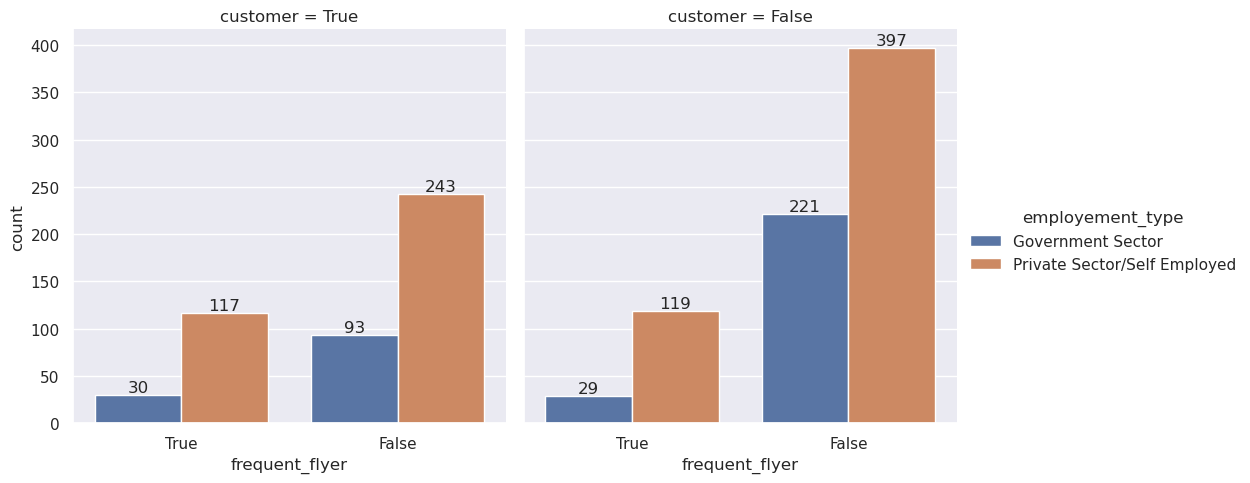

In [13]:
# plot catplot
g = sns.catplot(data=df, x='frequent_flyer', col='customer', kind='count', order=[True, False], col_order=[True, False], hue='employement_type')

# add bar labels
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])

### Key insight #2
comparing travel habits between customers and non-customers, our customers fly more frequently (239) than do our non-customers (178). This is good for us as we are matching our product (travel insurance) with people who travel frequently, whose likelihood of needing travel insurance is higher than someone who is not a frequent flyer.

### Requirement 2: What is the typical profile of customers and non-customers?

[Text(0, 0, '51'),
 Text(0, 0, '38'),
 Text(0, 0, '23'),
 Text(0, 0, '83'),
 Text(0, 0, '42'),
 Text(0, 0, '19'),
 Text(0, 0, '51'),
 Text(0, 0, '19'),
 Text(0, 0, '55'),
 Text(0, 0, '78'),
 Text(0, 0, '24')]

[Text(0, 0, '36'),
 Text(0, 0, '53'),
 Text(0, 0, '68'),
 Text(0, 0, '200'),
 Text(0, 0, '83'),
 Text(0, 0, '28'),
 Text(0, 0, '97'),
 Text(0, 0, '48'),
 Text(0, 0, '53'),
 Text(0, 0, '80'),
 Text(0, 0, '20')]

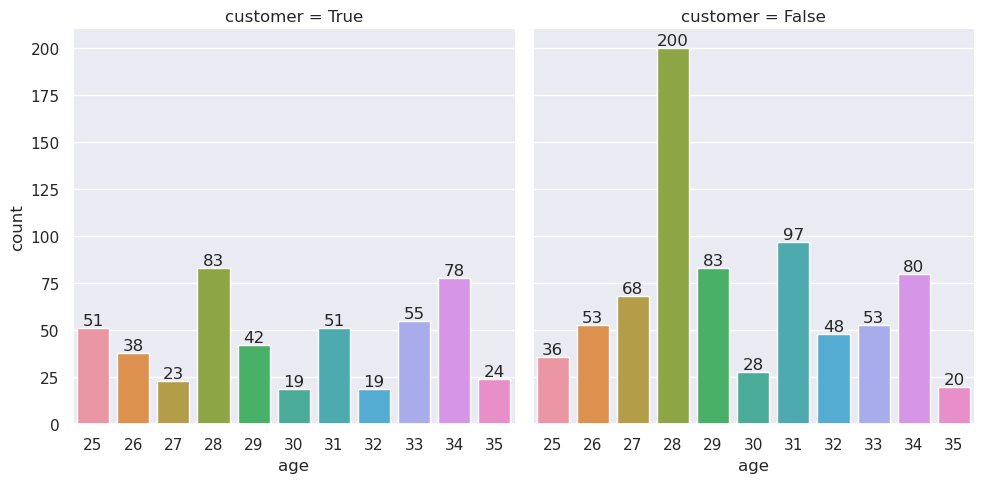

In [15]:
# plot catplot
g = sns.catplot(data=df, x='age', col='customer', kind='count', col_order=[True, False])

# add bar labels
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0]);

### Key Insight #3

customer top 3 ages: 34, 28, 25

non-customer top 3 ages: 28, 31, 29

Target 28 years old as they are asking for quotes the most

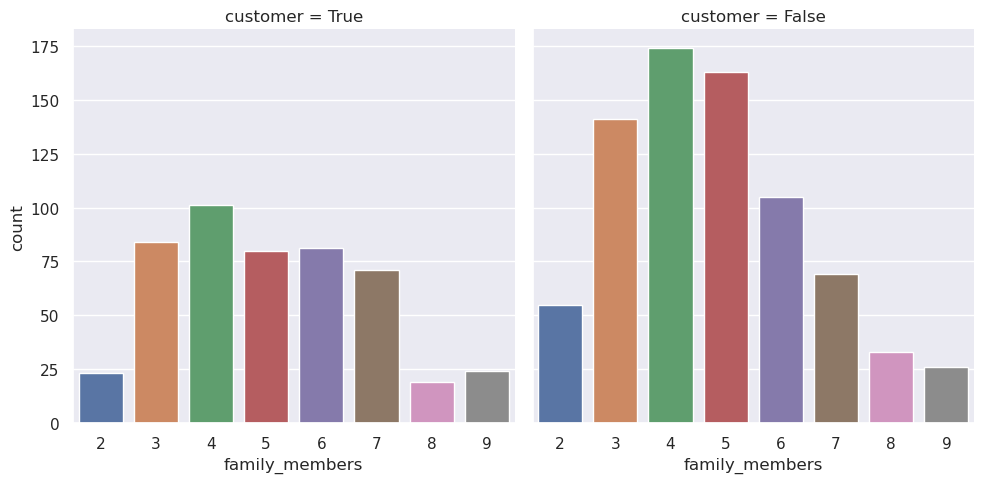

In [16]:
# plot catplot
g = sns.catplot(data=df, col='customer', x='family_members', kind='count', col_order=[True, False])

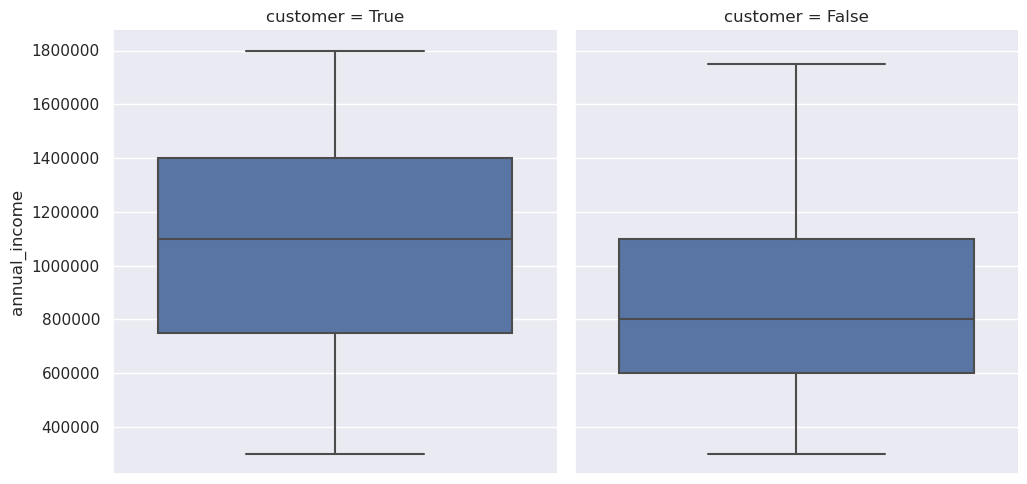

In [17]:
# plot catplot
g = sns.catplot(data=df, y='annual_income', col='customer', kind='box', col_order=[True, False])

# change y-axis scale
plt.ticklabel_format(style='plain', axis='y')

### Key Insight #4
customer median annual income a little above $120,000

non-customer median annual income $80,000

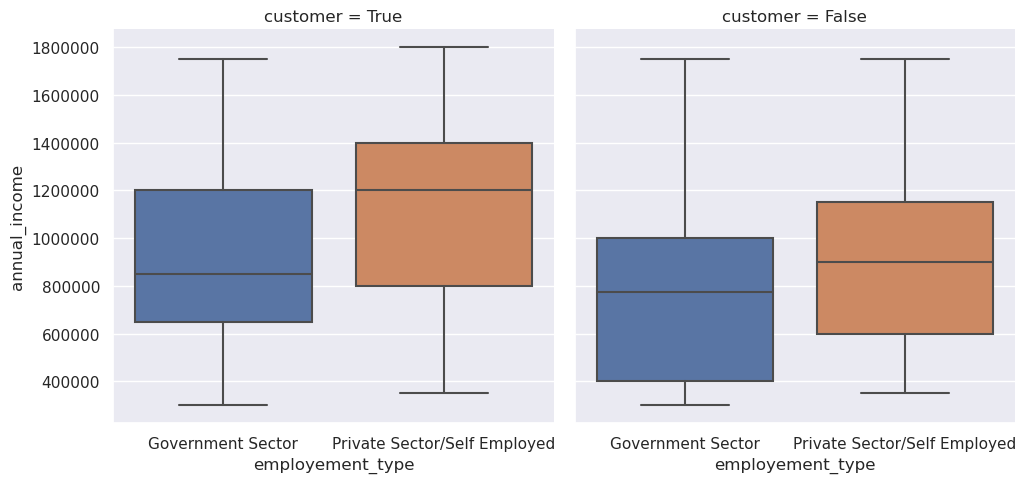

In [18]:
# plot catplot
g = sns.catplot(data=df, x='employement_type', y='annual_income', kind='box', col='customer', col_order=[True, False])

# change y-axis scale
plt.ticklabel_format(style='plain', axis='y')

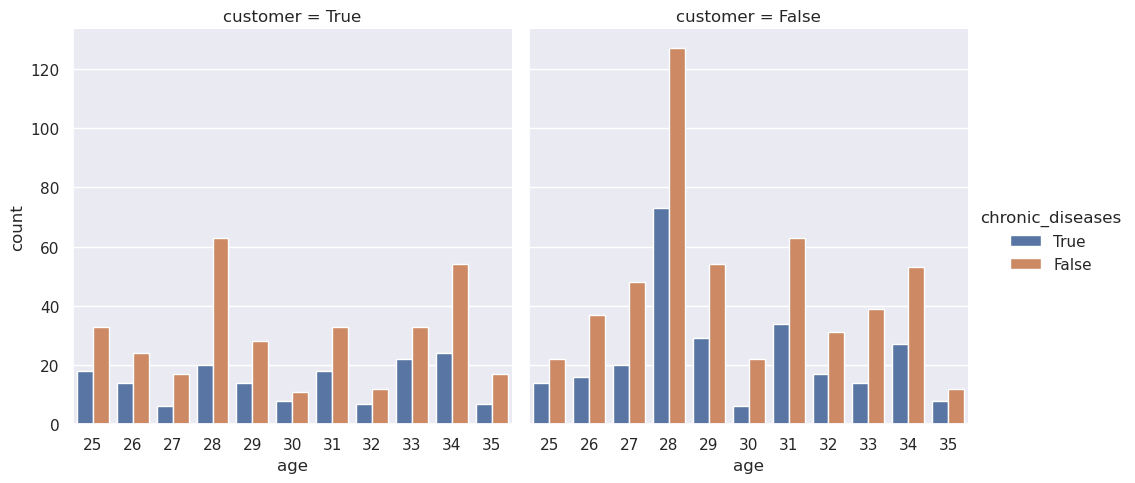

In [19]:
# plot catplot
g = sns.catplot(data=df, col='customer', x='age', kind='count', col_order=[True, False], hue='chronic_diseases', hue_order=[True, False])